# Задача 1.4

In [1]:
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def empirical_distr_func1(sample, x):
    y = np.empty((x.size,), dtype=float)
    for i in range(x.size):
        y[i] = (sample < x[i]).sum(0) /float(sample.size)
    return y

In [3]:
N = 10000

Сгенерируем выборку из стандартного нормального распределения для N = 10000:

In [4]:
sample = sps.norm.rvs(loc = 0, scale = 1, size = N)

Посчитаем по ней эмпирическую функцию распределения для всех n <= N:

In [5]:
sample_1 = sample

In [6]:
import scipy

In [7]:
x = np.linspace(-5, 5, 1000)
empirical_distribution_functions = scipy.eye(N, 1000)
for i in range(1, N + 1):
   empirical_distribution_functions[i - 1] = empirical_distr_func1(sample[:i], x)

Построим графики зависимости эмпирической функции распределения при различных n. При значениях выборки - скачки эмпирической функции распределения.

# n = 10

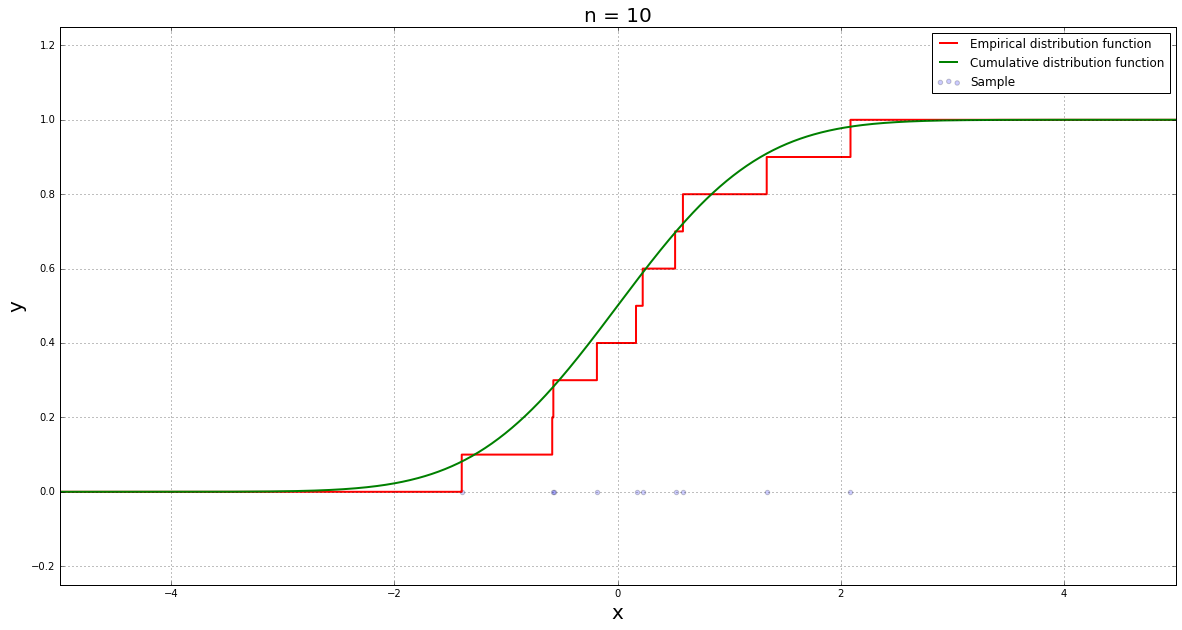

In [8]:
plt.figure(figsize=(20, 10))
plt.step(x,  empirical_distribution_functions[9], color = 'red', linewidth=2, label = 'Empirical distribution function')
plt.plot(x, sps.norm.cdf(x, loc = 0, scale = 1), color = 'green', linewidth = 2, label = 'Cumulative distribution function')
plt.scatter(sample_1[:10], np.zeros(10), alpha = 0.2, label='Sample')
plt.legend()
plt.xlim((-5, 5))
plt.ylim((-0.25, 1.25))
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('n = 10', fontsize = 20)
plt.grid() 
plt.show()

# n = 25

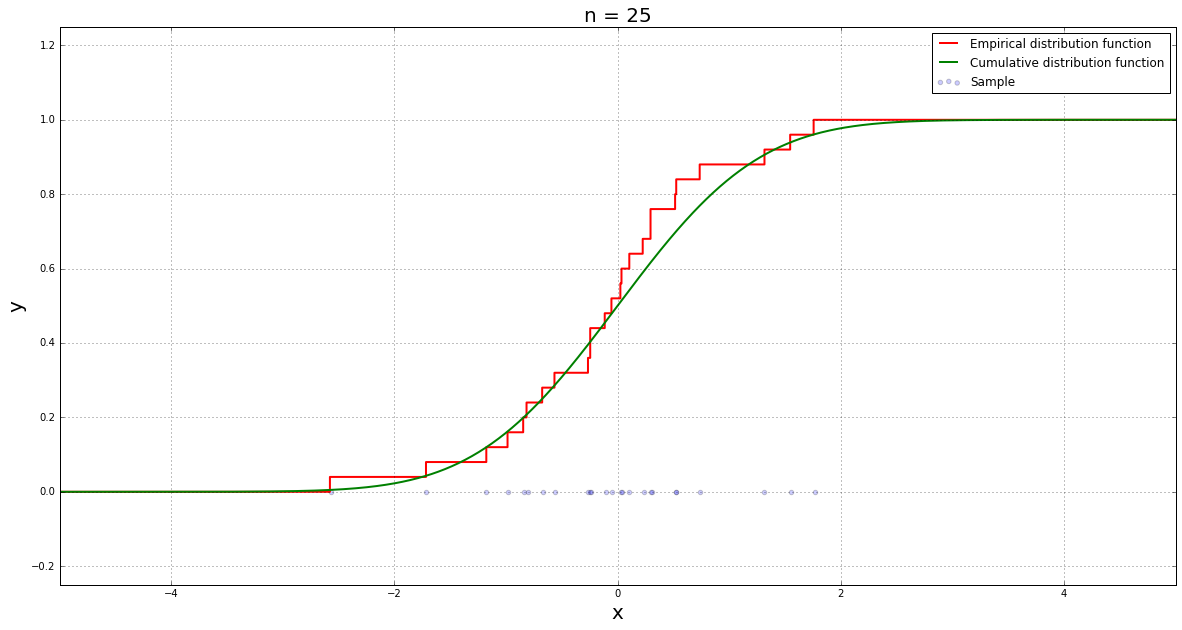

In [77]:
plt.figure(figsize=(20, 10))
plt.step(x, empirical_distribution_functions[24] , color = 'red', linewidth=2, label = 'Empirical distribution function')
plt.plot(x, sps.norm.cdf(x, loc = 0, scale = 1), color = 'green', linewidth = 2, label = 'Cumulative distribution function')
plt.scatter(sample_1[:25], np.zeros(25), alpha = 0.2, label='Sample')
plt.legend()
plt.xlim((-5, 5))
plt.ylim((-0.25, 1.25))
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('n = 25', fontsize = 20)
plt.grid() 
plt.show()

# n = 50

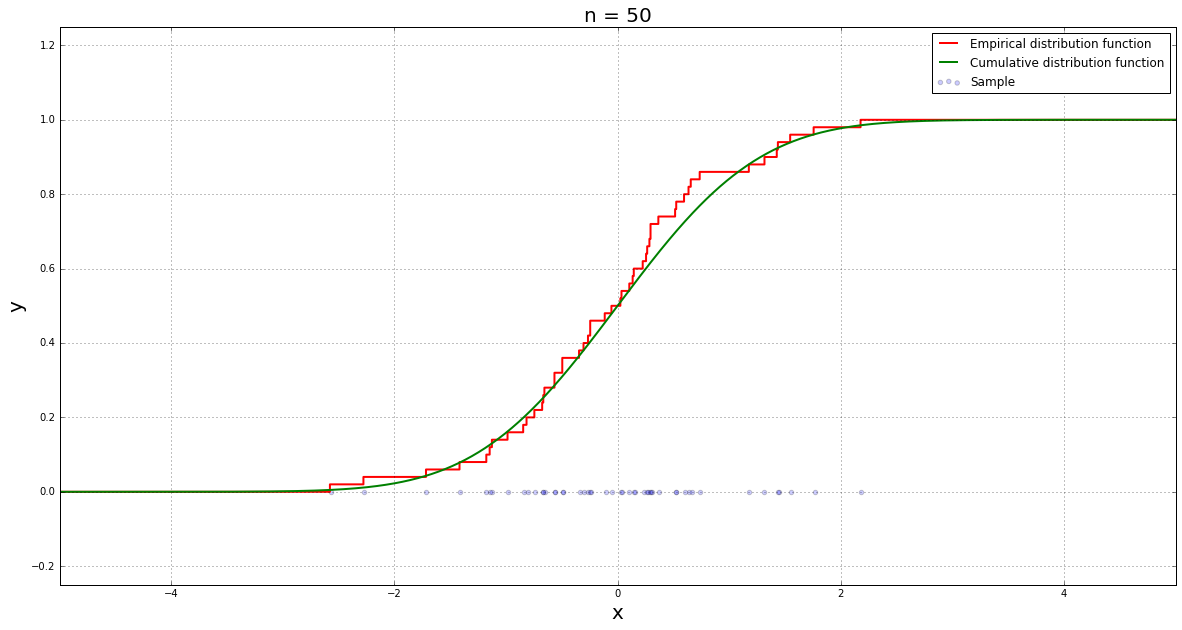

In [79]:
plt.figure(figsize=(20, 10))
plt.step(x, empirical_distribution_functions[49] , color = 'red', linewidth=2, label = 'Empirical distribution function')
plt.plot(x, sps.norm.cdf(x, loc = 0, scale = 1), color = 'green', linewidth = 2, label = 'Cumulative distribution function')
plt.scatter(sample_1[:50], np.zeros(50), alpha = 0.2, label='Sample')
plt.legend()
plt.xlim((-5, 5))
plt.ylim((-0.25, 1.25))
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('n = 50', fontsize = 20)
plt.grid() 
plt.show()

# n = 100

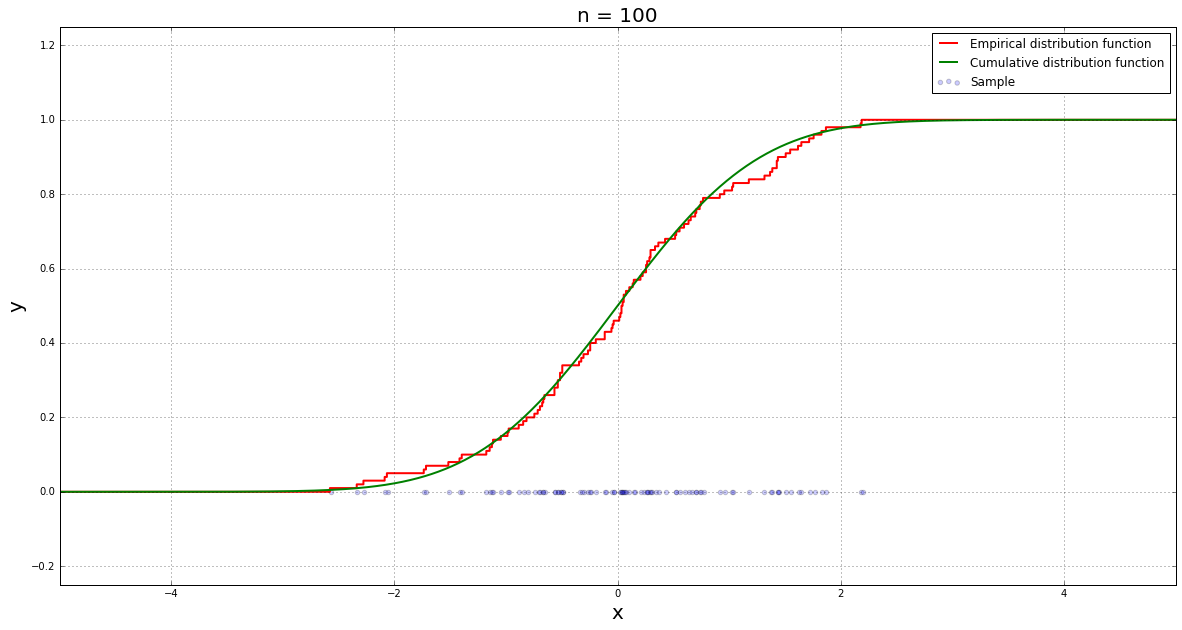

In [80]:
plt.figure(figsize=(20, 10))
plt.step(x, empirical_distribution_functions[99] , color = 'red', linewidth=2, label = 'Empirical distribution function')
plt.plot(x, sps.norm.cdf(x, loc = 0, scale = 1), color = 'green', linewidth = 2, label = 'Cumulative distribution function')
plt.scatter(sample_1[:100], np.zeros(100), alpha = 0.2, label='Sample')
plt.legend()
plt.xlim((-5, 5))
plt.ylim((-0.25, 1.25))
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('n = 100', fontsize = 20)
plt.grid() 
plt.show()

# n = 1000

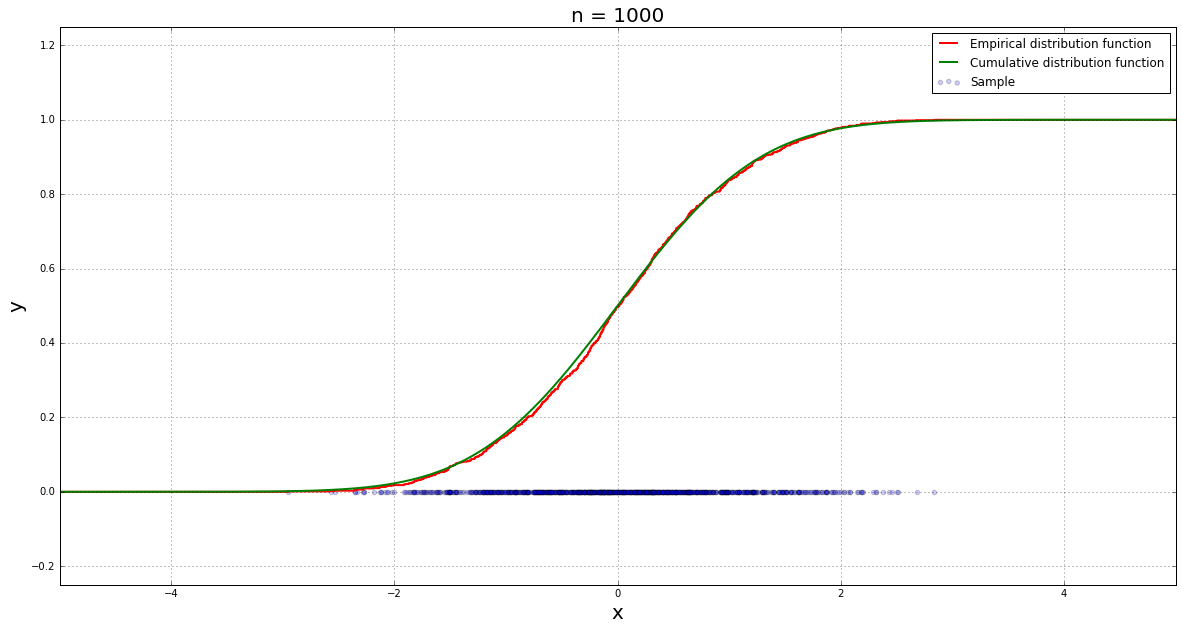

In [82]:
plt.figure(figsize=(20, 10))
plt.step(x, empirical_distribution_functions[999] , color = 'red', linewidth = 2, label = 'Empirical distribution function')
plt.plot(x, sps.norm.cdf(x, loc = 0, scale = 1), color = 'green', linewidth = 2, label = 'Cumulative distribution function')
plt.scatter(sample_1[:1000], np.zeros(1000), alpha = 0.2, label='Sample')
plt.legend()
plt.xlim((-5, 5))
plt.ylim((-0.25, 1.25))
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('n = 1000', fontsize = 20)
plt.grid() 
plt.show()

# n = 10000

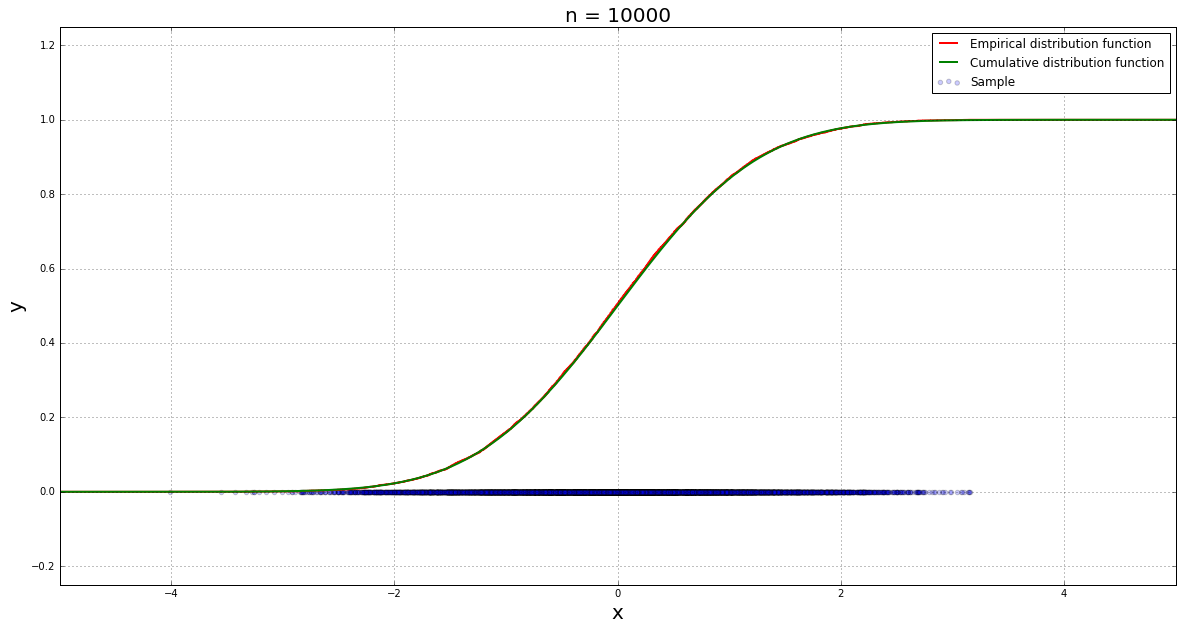

In [83]:
plt.figure(figsize=(20, 10))
plt.step(x, empirical_distribution_functions[9999] , color = 'red', linewidth=2, label = 'Empirical distribution function')
plt.plot(x, sps.norm.cdf(x, loc = 0, scale = 1), color = 'green', linewidth = 2, label = 'Cumulative distribution function')
plt.scatter(sample_1[:10000], np.zeros(10000), alpha = 0.2, label='Sample')
plt.legend()
plt.xlim((-5, 5))
plt.ylim((-0.25, 1.25))
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.title('n = 10000', fontsize = 20)
plt.grid() 
plt.show()

Из графиков видно, что при увеличении n эмпирическая функция распределения приближается к обычной (уменьшается разность значений функций распределения)

# $D_n$

Для каждого n <= N найдем значение $D_n = \sup_\limits{x\in R}\left|F_n(x) - F(x)\right|$:

In [87]:
def find_D_n(sample_3):
    res_1 = np.zeros(sample_3.size)
    for i in range(sample_3.size):
        sample_4 = np.array(sample_3[:(i + 1)])
        sample_4.sort()
        F = sps.norm.cdf(sample_4, loc = 0, scale = 1)
        y_1 = np.arange(0, i + 1) / (float)(i + 1)
        y_2 = y_1 + 1. / (i + 1)
        res_1[i] = max(np.abs(y_1 - F[:(i + 1)]).max(0), np.abs(y_2 - F[:(i + 1)]).max(0))
    return res_1

Построим график зависимости $D_n$ от n:

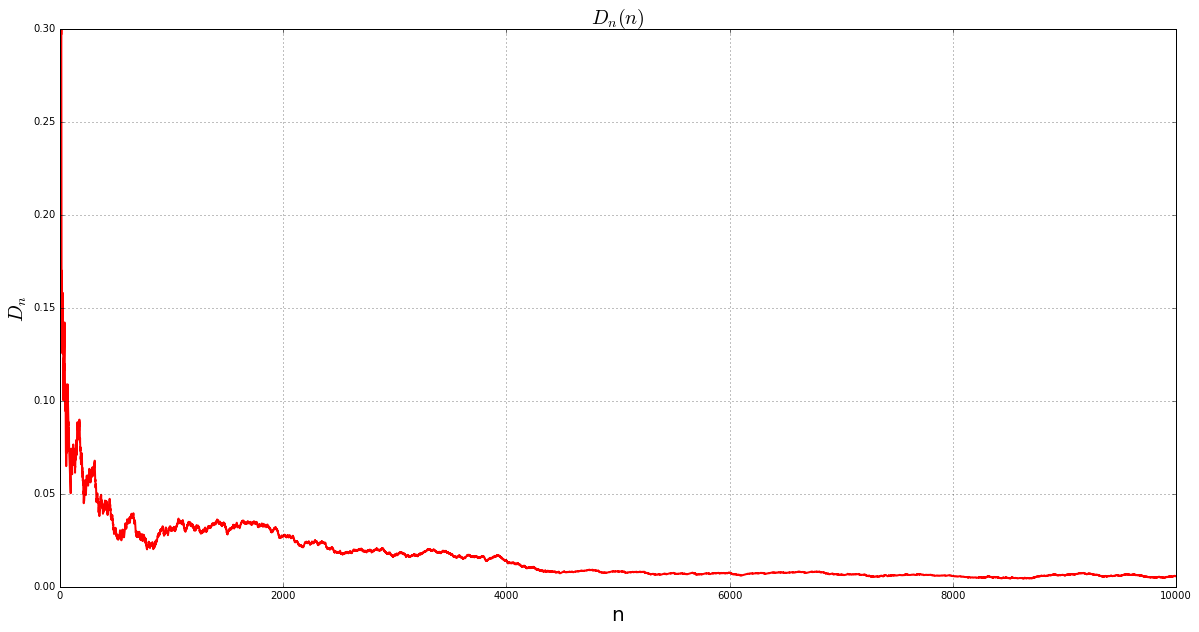

In [90]:
plt.figure(figsize=(20, 10))
plt.plot(np.arange(1, N + 1), find_D_n(sample), color = 'red', linewidth=2)

plt.legend()
plt.xlim((1, N))
plt.ylim((0, 0.3))
plt.xlabel('n', fontsize = 20)
plt.ylabel('$D_n$', fontsize = 20)
plt.title('$D_n(n)$', fontsize = 20)
plt.grid() 
plt.show()

По теореме Гливенко-Кантелли, если $X_1, X_2...X_n$ - выборка неограниченного размера с функцией распределения $F(x)$, то $\sup_{x\in R}{|F_n(x) - F(x)|} \xrightarrow{п.н.} 0$. Из графика видно, что при увеличении n $D_n$ стремится к нулю.